In [1]:
from bokeh.io import show, output_notebook
from bokeh.models import LogColorMapper, ColorMapper,LogTicker, ColorBar,AdaptiveTicker, ContinuousColorMapper,LinearColorMapper
from bokeh.palettes import Viridis6 as palette
from bokeh.plotting import figure

from bokeh.sampledata.us_counties import data as counties
from bokeh.sampledata.unemployment import data as unemployment

In [2]:
import pandas as pd

In [3]:
import json

In [4]:
output_notebook()

Loading BokehJS ...

In [5]:
permit_data = pd.read_csv('permits_with_zip.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (2,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [6]:
permit_data.shape

(578067, 143)

In [7]:
permit_data.head().to_clipboard()

In [8]:
import matplotlib.pyplot as plt

In [9]:
permit_data.ISSUE_DATE = pd.DatetimeIndex(permit_data.ISSUE_DATE)

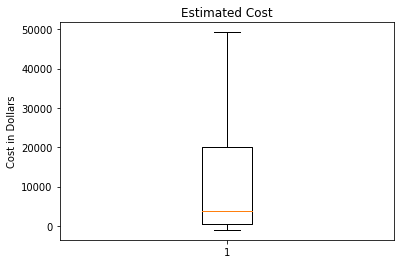

In [10]:
plt.boxplot(permit_data.ESTIMATED_COST.dropna(), showfliers=False)
plt.title('Estimated Cost')
plt.ylabel('Cost in Dollars')
plt.xticks=''
plt.show()

In [11]:
permit_data[permit_data.ESTIMATED_COST==permit_data.ESTIMATED_COST.max()]

,Unnamed: 0,ID,PERMIT#,PERMIT_TYPE,ISSUE_DATE,ESTIMATED_COST,AMOUNT_WAIVED,AMOUNT_PAID,TOTAL_FEE,STREET_NUMBER,...,Community Areas,Zip Codes,Census Tracts,Wards,:@computed_region_awaf_s7ux,full_street_nm,street_num_hundreds,addr_hundreds,zip,new_zip
182846,182846,2146435,100331285,PERMIT - ELECTRIC WIRING,2010-03-08,1.000000e+10,0.0,250.0,250.0,3813,...,1.0,4301.0,222.0,9.0,12.0,S GILES AVE,3800,3800 S GILES AVE,60653.0,60653


In [12]:
len(set([str(i)+str(v) for i,v in zip(permit_data.full_street_nm,permit_data.STREET_NUMBER)]))

213209

In [13]:
permit_data.ESTIMATED_COST.median()

3800.0

In [14]:
permit_data.ESTIMATED_COST.mean()

217460.14567063356

In [15]:
permit_data.ESTIMATED_COST.max()

9999999999.0

In [16]:
chicago_data = json.load(open('chicago_zip.json'))

In [17]:
chicago_data.keys()

dict_keys(['meta', 'data'])

In [18]:
chicago_data_li = [(i[-3],
                    eval(i[-5].replace('MULTIPOLYGON ','').replace('(','[').replace(')',']').replace(', ',',').replace(' ',','))[0])
                    for i in chicago_data['data']]

In [19]:
zip_codes = permit_data.new_zip.unique()

In [20]:
lons_and_lats = {zi:dict(lons=li[0][::2],
                         lats=li[0][1::2]) for zi,li in chicago_data_li}

In [21]:
lons_and_lats_ordered = list(lons_and_lats.items())

In [22]:
permit_counts = permit_data.groupby(['new_zip','PERMIT_TYPE'])['ID'].count().unstack().fillna(0)

In [23]:
permit_counts.columns

Index(['PERMIT - EASY PERMIT PROCESS', 'PERMIT - ELECTRIC WIRING',
       'PERMIT - ELEVATOR EQUIPMENT', 'PERMIT - FOR EXTENSION OF PMT',
       'PERMIT - NEW CONSTRUCTION', 'PERMIT - PORCH CONSTRUCTION',
       'PERMIT - REINSTATE REVOKED PMT', 'PERMIT - RENOVATION/ALTERATION',
       'PERMIT - SCAFFOLDING', 'PERMIT - SIGNS',
       'PERMIT - WRECKING/DEMOLITION'],
      dtype='object', name='PERMIT_TYPE')

In [24]:
irs_2016 = pd.read_csv(r"C:\Development\Python\Big_Data\BigDataFinal\zip_irs_data\16zpallagi.csv")

In [25]:
irs_agi = irs_2016[irs_2016.zipcode.isin(zip_codes)].groupby('zipcode').A00100.sum()/irs_2016[irs_2016.zipcode.isin(zip_codes)].groupby('zipcode').N1.sum()

In [26]:
irs_agi

zipcode
0         69.717152
60064     30.943016
60185     63.209858
60411     38.437500
60601    234.699237
60602    251.324615
60603    412.135556
60604    739.791667
60605    133.102861
60606    579.978378
60607    141.092656
60608     41.274563
60609     36.364634
60610    160.905364
60611    314.530285
60612     49.710624
60613     99.386854
60614    221.804472
60615     66.606846
60616     60.330240
60617     37.416187
60618     74.986760
60619     35.777182
60620     32.366170
60621     23.730176
60622    102.324679
60623     27.915209
60624     25.634822
60625     59.797094
60626     45.605200
            ...    
60633     45.358363
60634     47.278502
60636     24.731743
60637     51.526513
60638     54.510918
60639     32.098954
60640     67.829156
60641     48.436958
60642     94.577320
60643     60.770375
60644     27.312713
60645     55.034223
60646     95.190395
60647     70.282728
60649     35.342940
60651     29.505055
60652     46.961218
60653     43.890936
60654    191

In [27]:
stock = pd.read_csv(r"C:\Development\Python\Big_Data\BigDataFinal\housing_stock_data\ACS_17_5YR_DP04_with_ann.csv", skiprows=1)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (299,300) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
stock.head()

,Id,Id2,Geography,Estimate; HOUSING OCCUPANCY - Total housing units,Margin of Error; HOUSING OCCUPANCY - Total housing units,Percent; HOUSING OCCUPANCY - Total housing units,Percent Margin of Error; HOUSING OCCUPANCY - Total housing units,Estimate; HOUSING OCCUPANCY - Total housing units - Occupied housing units,Margin of Error; HOUSING OCCUPANCY - Total housing units - Occupied housing units,Percent; HOUSING OCCUPANCY - Total housing units - Occupied housing units,...,Percent; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Occupied units paying rent (excluding units where GRAPI cannot be computed) - 30.0 to 34.9 percent,Percent Margin of Error; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Occupied units paying rent (excluding units where GRAPI cannot be computed) - 30.0 to 34.9 percent,Estimate; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Occupied units paying rent (excluding units where GRAPI cannot be computed) - 35.0 percent or more,Margin of Error; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Occupied units paying rent (excluding units where GRAPI cannot be computed) - 35.0 percent or more,Percent; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Occupied units paying rent (excluding units where GRAPI cannot be computed) - 35.0 percent or more,Percent Margin of Error; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Occupied units paying rent (excluding units where GRAPI cannot be computed) - 35.0 percent or more,Estimate; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Not computed,Margin of Error; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Not computed,Percent; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Not computed,Percent Margin of Error; GROSS RENT AS A PERCENTAGE OF HOUSEHOLD INCOME (GRAPI) - Not computed
0,8600000US00601,601,ZCTA5 00601,7323,160,7323,(X),5818,249,79.4,...,8.8,4.2,497,126,45.8,9.5,1563,212,(X),(X)
1,8600000US00602,602,ZCTA5 00602,17210,240,17210,(X),12719,374,73.9,...,6.0,5.1,656,176,45.8,9.0,1794,283,(X),(X)
2,8600000US00603,603,ZCTA5 00603,24420,343,24420,(X),19009,503,77.8,...,5.8,2.5,1696,290,42.3,5.3,3755,417,(X),(X)
3,8600000US00606,606,ZCTA5 00606,2789,126,2789,(X),1959,154,70.2,...,0.0,26.5,79,44,58.5,18.7,365,103,(X),(X)
4,8600000US00610,610,ZCTA5 00610,12378,208,12378,(X),9120,375,73.7,...,14.2,9.2,469,153,45.5,10.7,1009,179,(X),(X)


In [29]:
stock['Estimate; HOUSING TENURE - Occupied housing units - Renter-occupied']

0        2648
1        3225
2        7767
3         500
4        2040
5        8111
6         897
7        2107
8         859
9        5995
10       1927
11       3542
12        344
13       1891
14       1998
15       3319
16       2767
17        392
18       1227
19        183
20       1053
21       1998
22       3721
23       1625
24       5200
25       1799
26       3493
27       4173
28        918
29       4172
         ... 
33090      29
33091       6
33092      45
33093       0
33094      10
33095    3750
33096      66
33097     490
33098       0
33099      20
33100     326
33101     113
33102      59
33103       5
33104     399
33105    1537
33106       3
33107     203
33108       0
33109    2009
33110       0
33111      16
33112      63
33113     221
33114      17
33115       0
33116      97
33117     149
33118       0
33119     362
Name: Estimate; HOUSING TENURE - Occupied housing units - Renter-occupied, Length: 33120, dtype: int64

In [30]:
zip_old = stock.set_index('Id2')['Estimate; HOUSING TENURE - Occupied housing units - Owner-occupied'] / stock.set_index('Id2')['Estimate; HOUSING TENURE - Occupied housing units - Renter-occupied']

In [31]:


county_xs = [dat['lons'] for z,dat in lons_and_lats_ordered if int(z) in zip_codes and int(z) in zip_old.index]
county_ys = [dat['lats'] for z,dat in lons_and_lats_ordered if int(z) in zip_codes and int(z) in zip_old.index]

county_names = [i for i,v in lons_and_lats_ordered if int(i) in zip_old.index]
# county_rates = [unemployment[county_id] for county_id in counties]
color_mapper = LinearColorMapper(palette=palette)

data=dict(
    x=county_xs,
    y=county_ys,
    name=county_names,
    rate=[zip_old[int(z)] for z in county_names  if int(z) in zip_old.index],
)

TOOLS = "pan,wheel_zoom,reset,hover,save"


p = figure(
    title="Number of Units Built After 2010", tools=TOOLS,
    x_axis_location=None, y_axis_location=None,
    tooltips=[
        ("Name", "@name"), ("Value", "@rate")
    ],
)

p.grid.grid_line_color = None
p.hover.point_policy = "follow_mouse"

p.patches('x', 'y', source=data,
          fill_color={'field': 'rate', 'transform': color_mapper},
          fill_alpha=0.7, line_color="white", line_width=0.5)

color_bar = ColorBar(color_mapper=color_mapper, 
                     ticker=AdaptiveTicker(),
#                      label_standoff=12, 
                     border_line_color=None,
                     location=(0,0))

p.outline_line_color = None

p.add_layout(color_bar, 'right')

show(p)

In [40]:
for p in permit_counts.columns:
    if 'ELEVATOR' in p:
        income = permit_counts[p]


        county_xs = [dat['lons'] for z,dat in lons_and_lats_ordered if int(z) in zip_codes]
        county_ys = [dat['lats'] for z,dat in lons_and_lats_ordered if int(z) in zip_codes]

        county_names = [i for i,v in lons_and_lats_ordered]
        # county_rates = [unemployment[county_id] for county_id in counties]
    #     color_mapper = LogColorMapper(palette=palette, high=max(income), low=max([1,min(income)]))
        color_mapper = LinearColorMapper(palette=palette, high=max(income), low=max([1,min(income)]))

        data=dict(
            x=county_xs,
            y=county_ys,
            name=county_names,
            rate=[income.get(int(z), 0) for z in county_names],
        )

        TOOLS = "pan,wheel_zoom,reset,hover,save"


        p = figure(
            title=p, tools=TOOLS,
            x_axis_location=None, y_axis_location=None,
            tooltips=[
                ("Name", "@name"), ("Value", "@rate")
            ],
        )

        p.grid.grid_line_color = None
        p.hover.point_policy = "follow_mouse"

        p.patches('x', 'y', source=data,
                  fill_color={'field': 'rate', 'transform': color_mapper},
                  fill_alpha=0.7, line_color="white", line_width=0.5)

        color_bar = ColorBar(color_mapper=color_mapper, 
                             ticker=AdaptiveTicker(),
        #                      label_standoff=12, 
                             border_line_color=None,
                             location=(0,0))

        p.outline_line_color = None

        p.add_layout(color_bar, 'right')

        show(p)

In [33]:
price_dat = pd.read_csv(r"C:\Development\Python\Big_Data\BigDataFinal\Zip_MedianListingPricePerSqft_AllHomes.csv", encoding='ansi')

In [34]:
price_zips = price_dat.set_index('RegionName').drop('City	State	Metro	CountyName	SizeRank'.split('\t'), axis=1)

In [35]:
price_zips = price_zips.transpose()

In [36]:
price_zips.head()

RegionName,60657,10023,77494,60614,77449,79936,77084,10002,60640,94109,...,85927,5056,97134,12720,87525,84719,27972,81225,802,820
2010-01,NaN,1191.765980,98.166570,349.875000,61.400155,88.630228,62.749572,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02,NaN,1163.301399,97.829055,333.975410,61.367127,88.003356,63.528010,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03,NaN,1163.301399,97.784810,332.692308,62.054079,87.788638,63.701923,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04,NaN,1280.719614,98.313705,324.875000,62.600321,87.920489,63.793103,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05,NaN,1265.707521,98.294070,327.377422,62.066710,87.307722,63.261344,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
price_zips_counts = {col:price_zips.shape[0]-sum(price_zips[col].isna()) for col in price_zips.columns}

In [38]:
sum(price_zips[10023].isna())

0

In [39]:
reg_60647 = regression_data[regression_data.zip_code==60647]

NameError: name 'regression_data' is not defined

In [ ]:
ditch_cols = '''psq_lag_1
lag_1
forward_1
psq_lag_2
lag_2
forward_2
psq_lag_3
lag_3
forward_3
psq_lag_4
lag_4
forward_4
psq_lag_5
lag_5
forward_5
psq_lag_6
lag_6
forward_6
psq_lag_7
lag_7
forward_7
psq_lag_8
lag_8
forward_8
psq_lag_9
lag_9
forward_9
psq_lag_10
lag_10
forward_10
psq_lag_11
lag_11
forward_11
psq_lag_12
lag_12
forward_12'''.split('\n')

In [ ]:
reg_60647_simple = reg_60647[[c for c in reg_60647.columns if c not in ditch_cols]].set_index('date').drop(['test','zip_code'], axis=1)

In [ ]:
import statsmodels.api as sm

In [ ]:
X = reg_60647_simple.drop('frac_return',axis=1)[1:].fillna(method='ffill')
X = sm.add_constant(X)

In [ ]:
y = reg_60647_simple.frac_return[1:]

In [ ]:
model = sm.OLS(y,X).fit()
model.summary()

In [ ]:
from sklearn import linear_model

In [ ]:
clf = linear_model.Lasso()
clf.fit(reg_60647_simple.drop('frac_return',axis=1)[1:].fillna(method='ffill'),y)

In [ ]:
len(clf.coef_)

In [ ]:
len(reg_60647_simple.drop('frac_return',axis=1)[1:].columns)

In [ ]:
list(zip(reg_60647_simple.drop('frac_return',axis=1)[1:].columns,
         clf.coef_))

In [ ]:
reg_60647_simple.drop(['price_per_square_foot','median_home_price'], axis=1)[1:].fillna(method='ffill').to_csv('data_60647.csv')